# ECON2048 Coursework

- There are 7 questions in total.
- The points of each question is shown at the end of each question.
- Write your code in the answer cell, where you see `#Answer Cell` in beginning of the cell.
- In the answer cell, you will see `# YOUR CODE HERE` and `raise NotImplementedError()`. Delete both of them, and write your own code.
- **Important!!!!** Follow the instructions given in the question and use the variable or function names specified. For example, in Question 1, you are asked to create a variable `arr` with certain requirement. You need to use this exact name in order to get the points.
- There are some cells with only one line `# Do not edit this cell!!!`. They are used for testing and do not edit these cells. They are actually set to be read-only, so you technically wouldn't be able to edit them even if you want to.
- Use IPython Version higher than 3. You can run the first code cell before Question 1 to check whether your IPython version is higher than 3. If there is no AssertionError raised, then you are fine.
- Regarding the functions, you can write some examples to test whether the function can correctly perform the task.
- You can insert cells if you need to try out different things. But make sure you delete them before you submit.
- Before you submit, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells, and make sure there is no error.

In [ ]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

## Question 1
Create a 2d array of shape (30,30), with 1 on the border and 0 inside.
Assign this array to variable `arr`.

[2 Points]

In [5]:
#Answer Cell
import numpy as np
arr = np.ones((30,30))
arr[1:-1,1:-1] = 0

In [ ]:
# Do not edit this cell!!!

## Question 2
Create a 2d array of shape (30,30), with elements being i+j, where i is the row index, and j is the column index. Assign this array to variable `arr`.

[2 Points]

In [6]:
#Answer Cell
arr = np.zeros((30,30))
for i in range(np.size(arr,0)):
    for j in range(np.size(arr,1)):
        arr[i,j] = i+j

In [7]:
# Do not edit this cell!!!

## Question 3
`random.randint` can be uesd to generate random integer numbers and it is used to generate a 2d array (shape being 30 by 30) with random integers from 0 to 9, and it is assigned to `arr` as shown below. Select column (or columns) of `arr` whose sums are divisible by 3 or divisible by 5 and assign it to `arr_sub` (2d array).  

[2 Points]

In [8]:
#Answer Cell
import numpy as np
np.random.seed(100) 
arr = np.random.randint(0,10,(30,30))
y = np.sum(arr,0)%3 == 0 
z = np.sum(arr,0)%5 == 0
sel = np.logical_or(y,z)
arr_sub = arr[:,sel]

In [9]:
# Do not edit this cell!!!

## Question 4
A 2d array named `arr` is generated using `random.randn` as shown below. Replace all elements in `arr` smaller than -1 with -1, elements bigger than 1 with 1, and elements between -1 and 1 (inclusive) with 0.

[2 Points]

In [10]:
#Answer Cell
import numpy as np
np.random.seed(100) 
arr = np.random.randn(30,30)
for i in range(np.size(arr,0)):
    for j in range(np.size(arr,1)):
        if arr[i,j] < -1:
            arr[i,j] = -1
        elif arr[i,j] >1:
            arr[i,j] = 1
        else:
            arr[i,j] = 0

In [11]:
# Do not edit this cell!!!

## Question 5 
Write a function named `fill_na_row` that takes a pandas DataFrame as input and returns a NaN filled DataFrame, where any NaN values are replaced by corresponding row means (average of each row without NaN values). Note that the input should not be modified. 

[2 Points]

In [12]:
#Answer Cell
import pandas as pd
import numpy as np
def fill_na_row(df):
    df2 = df.T
    df2 = df2.fillna(value=df2.mean())
    df = df2.T
    return df

In [13]:
# Do not edit this cell!!!

In [14]:
# Do not edit this cell!!!

## Question 6
(a) Write a function `ols_est` which takes a T by K 2d array X and a T by 1 2d array y, and returns a K by 4 pandas DataFrame, where the columns are "parameter estimates", "standard errors", "t statistics" and "p values". The results are calculated using OLS. (hint: `scipy.stats.t.cdf` can be used to calculate the value of cdf of t distribution. For example, `scipy.stats.t.cdf(x=0,df=2)` calculates the value of the cdf function at x=0 for a t distribution with 2 degress of freedom.) 

[3 Points]

In [15]:
#Answer Cell
import scipy.stats as st
import numpy as np
def ols_ets(X,y):
    import pandas as pd
    from pandas import DataFrame
    from pandas import Series
    from numpy import linalg
    T = np.size(X,0)
    K = np.size(X,1)
    beta_hat = np.linalg.inv(X.T@X)@X.T@y
    s1 = Series(beta_hat.flatten())
    y_fitted = X @ beta_hat
    res = y - y_fitted
    sigma_hat = res.T@res / (T-K)
    v = sigma_hat*np.linalg.inv(X.T@X)
    variance_beta_hat = np.diag(v)
    stderr = np.sqrt(np.abs(variance_beta_hat))
    s2 = Series(stderr)
    t_stat = np.zeros(np.size(beta_hat))
    for i in range(K):
        t_stat[i] = (beta_hat[i]/ stderr[i])          
    s3 = Series(t_stat)
    p_value = np.zeros(np.size(t_stat))
    for i in range(np.size(p_value)):
        p_value[i] = (1-st.t.cdf(abs(t_stat[i]),T-K))*2
    s4 = Series(p_value)
    return DataFrame({'parameter estimates': s1, 'standard errors': s2, 't statistics': s3, 'p values': s4})

In [16]:
y = np.array([[1],[23],[4],[6],[53]]) #检查代码，随机代入y的值

In [17]:
X = np.array([[1,2],[1,3],[2,4],[1,5],[3,6]]) #检查代码，随机代入X的值

In [18]:
ols_ets(X,y) #检验

,parameter estimates,standard errors,t statistics,p values
0,14.375000,14.126475,1.017593,0.383791
1,-0.916667,5.956245,-0.153900,0.887458


In [81]:
# Do not edit this cell!!!

(b) Modify the function in (a) and name the new function as `ols_R2`, so the input is the same but the output is a scalar, which is R square of fitted model, 
$$R^{2}=\frac{ESS}{TSS}=\frac{\sum_{t=1}^{n}\left(\hat{y}_{t}-\bar{y}\right)^{2}}{\sum_{t=1}^{n}\left(y_{t}-\bar{y}\right)^{2}}.$$

[2 Points]

In [20]:
#Answer Cell
import numpy as np
def ols_R2(X,y):
    from numpy import linalg
    T = np.size(X,0)
    K = np.size(X,1)
    beta_hat = np.linalg.inv(X.T@X)@X.T@y
    y_fitted = X @ beta_hat
    y_mean = np.mean(y)
    ESS_value = np.zeros(T)
    TSS_value = np.zeros(T)
    for t in range(T):
        ESS_value[t] = np.square(y_fitted[t] - y_mean)
        TSS_value[t] = np.square(y[t] - y_mean)
    ESS = ESS_value.sum()
    TSS = TSS_value.sum()
    R2 = ESS / TSS
    return R2.item()

In [21]:
ols_R2(X,y) #检验

0.3105289793309201

In [ ]:
# Do not edit this cell!!!

(c) Modify the function in (b) and name the new function as `ols_F`, so the input is the same but the output is F statistic can be calculated as $$F=\frac{R^{2} /(k-1)}{(1-R^{2}) /(n-k)}.$$

[2 Points]

In [22]:
#Answer Cell
#Answer Cell
import numpy as np
def ols_F(X,y):
    from numpy import linalg
    T = np.size(X,0)
    K = np.size(X,1)
    beta_hat = np.linalg.inv(X.T@X)@X.T@y
    y_fitted = X @ beta_hat
    y_mean = np.mean(y)
    ESS_value = np.zeros(T)
    TSS_value = np.zeros(T)
    for t in range(T):
        ESS_value[t] = np.square(y_fitted[t] - y_mean)
        TSS_value[t] = np.square(y[t] - y_mean)
    ESS = ESS_value.sum()
    TSS = TSS_value.sum()
    R2 = ESS / TSS
    F = (R2.item()/(K-1)) / ((1-R2.item())/(T-K))
    return F

In [23]:
ols_F(X,y) #检验

1.3511618473662967

In [ ]:
# Do not edit this cell!!!

## Question 7
(a) A unit root is a stochastic trend in a time series. If a time series has a unit root, it shows a systematic pattern that is unpredictable. Let us first look at a simple AR(1) model without intercept:
$$
y_{t}=\rho y_{t-1}+e_{t}, t=0,1,2, \ldots
$$
where $e_t$ is the error term with zero mean. Assume that $y_0=0$ and $\rho=0.5$. Generate a 1d array named `yt_ar` that stores the values of $y_{t}, t=0,1,2,..., 100$ given that $e_{t}, t=1,2,..., 100$ is generated and store it in `et` using the code below. (Note that $y_{t}$ should have 101 elements)

[1 Point]

In [26]:
#Answer Cell
import numpy as np
np.random.seed(100)
et = np.random.randn(100)
yt_ar = np.zeros(101)
for i in range(np.size(yt_ar)):
    if i >= 1:
        yt_ar[i] = 0.5*yt_ar[i-1]+et[i-1]
    else:
        yt_ar[i] = 0

In [27]:
print(yt_ar) #检验

[ 0.         -1.74976547 -0.53220233  0.88693464  0.19103128  1.07683643
  1.05263706  0.7474982  -0.69629423 -0.53764295 -0.01382003 -0.464937
  0.20269499 -0.48224756  0.57572329  0.96058245  0.37588008 -0.34334034
  0.85806252 -0.00910436 -1.12287043  1.05754645  2.0703784   0.78331006
 -0.45078071 -0.04087166  0.91664637  1.18932353  1.95621789  0.65187089
  0.38161146  0.41320534 -1.23661433 -1.37465947  0.12912428  0.8150069
 -0.04844348  1.16540053 -1.10791656 -1.91035733 -2.18761318 -1.63824575
 -1.48729461 -0.73633274 -0.98110511  0.80919552 -1.32849786 -1.64755903
 -0.46627176 -1.84671438  0.54735667 -0.91433926 -1.00691582 -1.44350407
 -1.5496844  -0.66597873  0.17482022 -0.77481723  0.86206113  0.35141932
 -0.71402182 -1.2388093  -0.6007657  -0.06253823 -0.01772057 -1.64438968
 -1.86640472 -0.32016348  0.57612347  1.31498318 -0.77469902 -2.22853781
 -0.74817568 -0.70586497 -1.04215047  1.51353233  0.20605175  0.85347921
 -0.88025274  0.14044697 -1.03429961  0.17297167  0.77

In [ ]:
# Do not edit this cell!!!

(b) If $\rho=1$, the model becomes a unit root process:
$$
y_{t}=y_{t-1}+e_{t}, t=0,1,2, \ldots
$$
It is a random walk without drift. Assuming $y_0=0$, generate a 1d array named `yt_rw` that stores the values of $y_{t}, t=0,1,2,..., 100$ given that $e_{t}, t=1,2,..., 100$ is generated and store it in `et` using the code below.

[1 Point]

In [29]:
#Answer Cell
import numpy as np
np.random.seed(100)
et = np.random.randn(100)
yt_rw = np.zeros(101)
for i in range(np.size(yt_rw)):
    if i >= 1:
        yt_rw[i] = yt_rw[i-1]+et[i-1]
    else:
        yt_rw[i] = 0

In [30]:
print(yt_rw) #检验

[  0.          -1.74976547  -1.40708507  -0.25404927  -0.5064853
   0.47483548   0.98905432   1.21023399   0.14019066  -0.04930517
   0.20569628  -0.25233071   0.18283278  -0.40076227   0.4160848
   1.08880561   0.98439446   0.45311409   1.48284677   1.04471115
  -0.0736071    1.54537456   3.08697974   2.8351006    1.99266486
   2.17718355   3.11426575   3.8452661    5.20682222   4.88058416
   4.93626018   5.15865978   3.71544279   2.95909048   3.7755445
   4.52598926   4.07004233   5.2596646    3.56904777   2.21264872
   0.98021421   0.43577505  -0.23239669  -0.22508213  -0.83802086
   0.46172721  -1.27136841  -2.25467851  -1.89717076  -3.51074926
  -2.04003539  -3.22805299  -3.77779918  -4.71784535  -5.54577771
  -5.43691424  -4.92910465  -5.791332    -4.54186226  -4.6214735
  -5.51120498  -6.39300337  -6.37436442  -6.1365198   -6.12297125
  -7.75850065  -8.80271053  -8.18967165  -7.45346643  -6.426545
  -7.85873561  -9.69992391  -9.33383068  -9.66560782 -10.35482579
  -8.32021823  -

In [ ]:
# Do not edit this cell!!!

(c) Generate line plots of `yt_ar` and `yt_rw`, and put them in the same figure. In addition, generate a legend that indicate two processes as "AR(1)" and "Random Walk" correspondingly.

[1 Point]

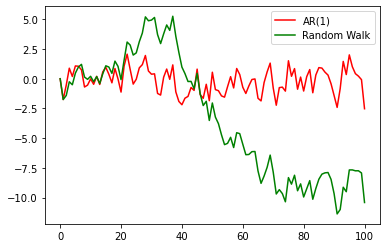

In [31]:
#Answer Cell
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(yt_ar, 'r-', label='AR(1)')
plt.plot(yt_rw, 'g-', label='Random Walk')
plt.legend()

(d) Given the model
$$
y_{t}=\rho y_{t-1}+e_{t}, t=0,1,2, \ldots
$$
whether $y_t$ has a unit root can be tested using the null hypothesis:
$$
\mathrm{H}_{0}: \rho=1.
$$
We are interested in the one-sided alternative:
$$
\mathrm{H}_{1}: \rho<1
$$
The alternative $\mathrm{H}_{1}: \rho>1 $ is not usually considered, since it implies that  $y_{t}$ is explosive.
A convenient equation for carrying out the unit root test is to subtract $y_{t-1}$ from both sides of the above model and to define $\theta=\rho-1$ :
$$
\Delta y_{t}=\alpha+\theta y_{t-1}+e_{t} .
$$
We can then test $\mathrm{H}_{0}: \theta=0$ against $\mathrm{H}_{1}: \theta<0$. However, under $\mathrm{H}_{0}$, the usual central limit theorem that underlies the asymptotic standard normal distribution for the $t$ statistic does not apply: the $t$ statistic does not have an approximate standard normal distribution even in large sample sizes. The asymptotic distribution of the $t$ statistic under $\mathrm{H}_{0}$ has come to be known as the Dickey-Fuller distribution. Although we cannot use the usual critical values, we can use the usual $t$ statistic for $\hat{\theta}$, and compare it to the appropriate critical values. The resulting test is known as the Dickey-Fuller (DF) test for a unit root. The theory used to obtain the asymptotic critical values is rather complicated but we can generate simulations to find critical values for various significance levels. We can use the functions provided by `statsmodels` package to estimate the coefficients and t statistic using OLS. For example, if we have `yt` as a 1d array of dependent variable and `xt` as a 1d array of independent variable, we can use the following code to fit a simple linear regression model $y_{t}=\alpha +\beta x_t+e_{t}$ using OLS:

`import statsmodels.api as sm
reg = sm.OLS(yt,sm.add_constant(xt)).fit()`

where `sm.add_constant` is used to add the intercept (create and add an array of 1s). The t statistics associated with null hypotheses intercept and slope being equal to 0 can be retrieved using `reg.tvalues` (which is a 1d array with with two t statistics).
Create a function named `tvalues_ols` that takes an 1d array ($y_t$, t =0,1,2,...,n) as input and use `statsmodels` to estimate the following model:
$$
\Delta y_{t}=\alpha+\theta y_{t-1}+e_{t}, t =1,2,...,n
$$
and return a scalar, which is the t statistic under the null hypothesis $\mathrm{H}_{0}: \theta=0$.

[1 Point]

In [38]:
#Answer Cell
import statsmodels.api as sm
import numpy as np
def tvalue_ols(yt):
    delta_yt = np.diff(yt, n=1)
    xt = np.zeros(np.size(delta_yt))
    for i in range(np.size(xt)):
        xt[i] = yt[i]
    reg = sm.OLS(delta_yt,sm.add_constant(xt)).fit()
    return reg.tvalues[1]

In [ ]:
# Do not edit this cell!!!

(e) 1000 samples of `et` ($e_t$ with standard normal distributions, with t=1,2,...,1000) are generated and stored in the rows of `et_all`. Denote the elements in the ith row of `et_all` as $e_{it}, t=1,2,...,1000$ (with t-1 being the column index, because of 0-indexing).
Use `et_all` to generate `yt_all`, where each row is a sample of $y_t$ with t=1,2,...,1000 $y_{t}=y_{t-1}+e_{t}$, and assume $y_0=0$. Use the function written in part(d) to generate the t statistics by taking each of the rows of `yt_all` as a sample, and assign these 1000 t values to variable `tvalues`. These t values are simulated from Dickey-Fuller distribution.

[2 Points]

In [36]:
#Answer Cell
import numpy as np
np.random.seed(200)
n_sample = 1000
n_obs = 1000
et_all = np.random.randn(n_sample,n_obs)
yt_all = np.zeros((n_sample,n_obs))
tvalues = np.zeros(n_sample)
for i in range(n_sample):
    for j in range(n_obs):
        if j >= 1:
            yt_all[i,j] = yt_all[i,j-1]+et_all[i,j]
        else:
            yt_all[i,j] = et_all[i,j]  
    tvalues[i] = tvalue_ols(yt_all[i, :])

In [ ]:
# Do not edit this cell!!!

In [ ]:
# Do not edit this cell!!!

(f) Generate a histogram (usig `bins=50`) for the simulated t statistics (tvalues) from (e) and compare it with a PDF from a normal distribution in the same figure (using `twinx`). Generate legend in appropriate positions (not covered by the other) for each of the plots, with the histogram named 'Dickey-Fuller' and normal PDF named "Normal".

[2 Points]

In [ ]:
#Answer Cell
import matplotlib.pyplot as plt
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot()
ax.hist(tvalues, bins=50, label='Dickey-Fuller')
ax.legend(loc='upper left')
xlim = ax.get_xlim()
pdfx = np.linspace(xlim[0], xlim[1], 200)
pdfy = stats.norm.pdf(pdfx) 
ax2 = ax.twinx()
ax2.plot(pdfx, pdfy, 'r-', label='Normal')
ax2.legend(loc='upper right')
plt.show()